In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


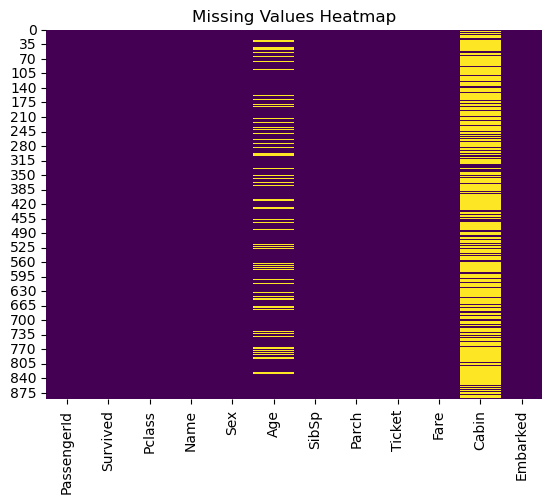

In [3]:
# Check data types and missing values
df.info()

# Statistical summary
df.describe(include='all')

# Count missing values
df.isnull().sum()
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Same for Ticket, Name, PassengerId
for col in ['Ticket', 'Name', 'PassengerId']:
    if col in df.columns:
        df = df.drop(col, axis=1)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Drop 'Cabin' only if it exists
if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis=1)
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [6]:
# Encode 'Sex' and 'Embarked' columns
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
#Sex: 0 = Female, 1 = Male

#Embarked: 0 = Cherbourg (C), 1 = Queenstown (Q), 2 = Southampton (S) )
# Double check
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [7]:
# 1. Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Separate input (X) and output (y)
X = df.drop('Survived', axis=1)  # features
y = df['Survived']               # target

# 3. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a Random Forest model (simple but powerful)
model = RandomForestClassifier()

# 5. Train the model
model.fit(X_train, y_train)

# 6. Predict on test data
y_pred = model.predict(X_test)

# 7. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877

Confusion Matrix:
 [[88 17]
 [17 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [8]:
import joblib

# Save
joblib.dump(model, 'titanic_model.pkl')
print("Model saved successfully! 🎯")

# Load
model = joblib.load('titanic_model.pkl')
print("Model loaded successfully! 🚀")

Model saved successfully! 🎯
Model loaded successfully! 🚀


In [9]:
import numpy as np

# Inputs
test_passengers = np.array([
    [1, 0, 25, 0, 0, 80, 0],
    [3, 1, 30, 0, 0, 7.25, 2],
    [2, 0, 22, 1, 0, 15, 2],
    [3, 1, 45, 0, 0, 8.05, 2],
    [1, 0, 60, 1, 1, 120, 0]
])

# Predict
predictions = model.predict(test_passengers)

# Display
for i, prediction in enumerate(predictions):
    status = "Survived 🛟" if prediction == 1 else "Did NOT survive 🚢💥"
    print(f"Passenger {i+1}: {status}")

Passenger 1: Survived 🛟
Passenger 2: Did NOT survive 🚢💥
Passenger 3: Survived 🛟
Passenger 4: Did NOT survive 🚢💥
Passenger 5: Survived 🛟


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
new_passengers = pd.DataFrame({
    'Pclass': [3, 3, 3, 3, 3],  # 3rd class
    'Sex': [1, 1, 1, 1, 1],     # Male
    'Age': [40, 22, 35, 28, 50],# Adult males
    'SibSp': [0, 0, 0, 0, 0],   # Traveling alone
    'Parch': [0, 0, 0, 0, 0],   # No parents/children
    'Fare': [7, 8, 6, 9, 5],    # Cheap tickets
    'Embarked': [2, 2, 2, 2, 2] # Embarked from 'S'
})

# Predict using the loaded model
predictions = model.predict(new_passengers)
print("Model Raw Predictions:", predictions)


# Display predictions
for idx, pred in enumerate(predictions, start=1):
    if pred == 1:
        print(f"Passenger {idx}: Survived 🛟")
    else:
        print(f"Passenger {idx}: Did NOT survive 🚢💥")

Model Raw Predictions: [0 0 0 0 0]
Passenger 1: Did NOT survive 🚢💥
Passenger 2: Did NOT survive 🚢💥
Passenger 3: Did NOT survive 🚢💥
Passenger 4: Did NOT survive 🚢💥
Passenger 5: Did NOT survive 🚢💥


In [11]:
likely_survivors = pd.DataFrame({
    'Pclass': [1, 1, 2],          # Higher classes
    'Sex': [0, 0, 0],             # Female
    'Age': [25, 30, 8],           # Women and a child
    'SibSp': [0, 1, 1],           
    'Parch': [0, 0, 1],
    'Fare': [100, 80, 30],
    'Embarked': [0, 1, 2]
})

In [12]:
import pandas as pd
import joblib

# Load model
model = joblib.load('titanic_model.pkl')

# Create new passengers (same as before)
new_passengers = pd.DataFrame({
    'Pclass': [1, 1, 3, 3, 3],
    'Sex': [0, 0, 1, 1, 0],
    'Age': [25, 30, 40, 35, 50],
    'SibSp': [0, 1, 0, 0, 0],
    'Parch': [0, 0, 0, 0, 0],
    'Fare': [100, 80, 7, 6, 8],
    'Embarked': [0, 0, 2, 2, 2]
})

# Predict
predictions = model.predict(new_passengers)

# Show results
for i, pred in enumerate(predictions):
    if pred == 1:
        print(f"Passenger {i+1}: Survived 🛟")
    else:
        print(f"Passenger {i+1}: Did NOT survive 🚢💥")

Passenger 1: Survived 🛟
Passenger 2: Survived 🛟
Passenger 3: Did NOT survive 🚢💥
Passenger 4: Did NOT survive 🚢💥
Passenger 5: Did NOT survive 🚢💥


In [13]:
import pandas as pd

group_a = pd.DataFrame({
    'Pclass': [1, 1, 1],
    'Sex': [1, 1, 1],               # Male
    'Age': [55, 62, 45],
    'SibSp': [0, 1, 1],
    'Parch': [0, 0, 1],
    'Fare': [100, 120, 150],
    'Embarked': [0, 1, 1]
})

In [14]:
predictions = model.predict(group_a)
print("Predictions for group_a:")
print(predictions)

Predictions for group_a:
[0 0 0]


In [15]:
probs = model.predict_proba(group_a)

for i, prob in enumerate(probs):
    print(f"Passenger {i+1}: Survive={prob[1]:.2f}, Not Survive={prob[0]:.2f}")

Passenger 1: Survive=0.28, Not Survive=0.72
Passenger 2: Survive=0.35, Not Survive=0.65
Passenger 3: Survive=0.32, Not Survive=0.68
